In [1]:
import pandas as pd
import matplotlib.pyplot as plt

urlr = 'https://raw.githubusercontent.com/IDR/idr.openmicroscopy.org/master/_data/releases.tsv'
releases = pd.read_csv(urlr, sep='\t', parse_dates=True, index_col=0)

urls = 'https://raw.githubusercontent.com/IDR/idr.openmicroscopy.org/master/_data/studies.tsv'
studies = pd.read_csv(urls, sep='\t')

# p = releases['Size (TB)'].plot(figsize=(10, 10), grid=True)

In [2]:
url = 'https://raw.githubusercontent.com/IDR/idr.openmicroscopy.org/master/_data/studies.tsv'
studies = pd.read_csv(url, sep='\t', parse_dates=True)
print('Studies:{} Images:{:.0f} Files:{:.0f} Size:{:.0f}'.format(
    len(studies),
    studies['5D Images'].sum(),
    studies['# of Files'].sum(),
    studies['Size'].sum() / 1e12,
))

Studies:68 Images:7677551 Files:19302633 Size:128


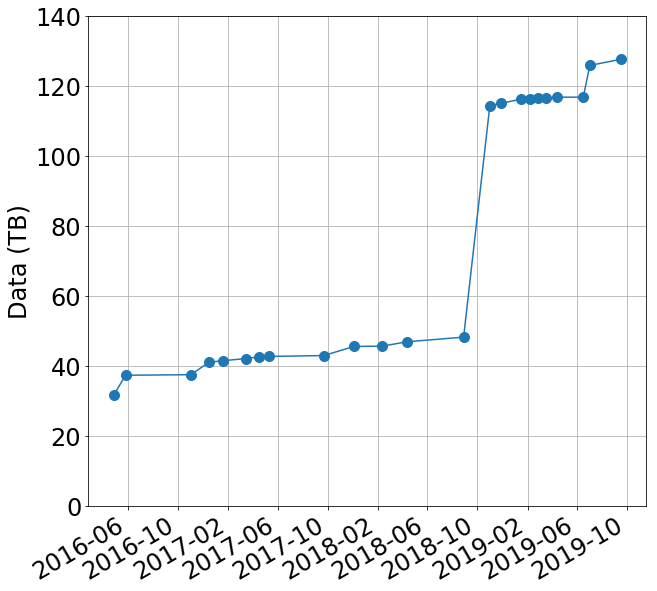

In [3]:
x = studies.join(
    releases.reset_index().set_index('Data release'),
    on='Introduced',
    how='left',
    lsuffix='l_',
    rsuffix='r_')

xy = x[['Date','Size']].groupby('Date').sum()
xy['Size'] = xy['Size'].cumsum() / 1e12
p = xy.plot(figsize=(10, 10), grid=True, legend=False, ylim=(0, (xy.Size.max() + 10).round(-1)), marker='o', markersize=10)
p.set_xlabel('')
p.set_ylabel('Data (TB)', {'size': 24})
[z.set_fontsize(24) for z in p.get_xticklabels()]
[z.set_fontsize(24) for z in p.get_yticklabels()]
p.get_figure().savefig('idr-size.svg', transparent=True, bbox_inches='tight')

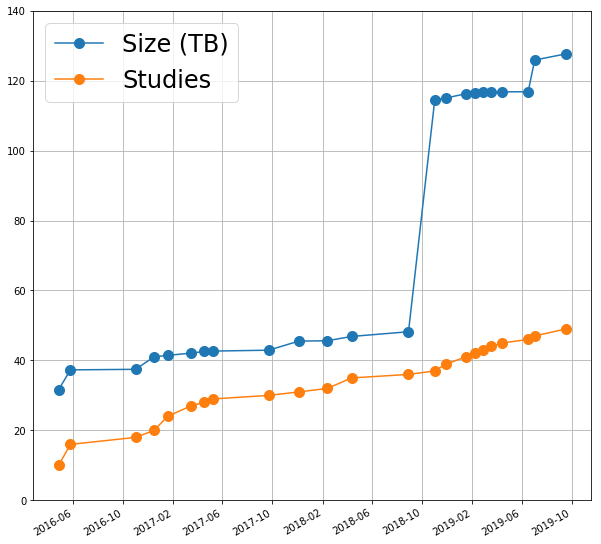

In [4]:
x = studies.join(
    releases.reset_index().set_index('Data release'),
    on='Introduced',
    how='left',
    lsuffix='l_',
    rsuffix='r_')

xy = x[['Date', 'Study', 'Size']]
xy = xy.assign(Studies=(x['5D Images'] > 0))
xy = xy.groupby(['Date', 'Study']).sum()
xy['Studies'] = xy['Studies'] > 0
xy = xy.groupby(['Date']).sum()

xy['Size'] = xy['Size'].cumsum() / 1e12
xy['Studies'] = xy['Studies'].cumsum()
p2 = xy.plot(figsize=(10, 10), grid=True, legend=True, ylim=(0, (xy.Size.max() + 10).round(-1)), marker='o', markersize=10)
p2.set_xlabel('')
p2.set_ylabel('')
[z.set_fontsize(24) for z in p.get_xticklabels()]
[z.set_fontsize(24) for z in p.get_yticklabels()]
p2.legend(loc='upper left', labels=['Size (TB)', 'Studies'], prop={'size': 24})
p2.get_figure().savefig('idr-studies.svg', transparent=True, bbox_inches='tight')